## Problem 1. Clustering with the k-Means algorithm

In [145]:
import numpy as np
import random as rd

In [146]:
# Problem 1 (a)
def euclidean_distance(a, b):
    """ 
    Takes two vectors and returns the Euclidean distance between them 
    Input: a - input vector a
           b - input vector b
    Output: the Euclidean distance between vectors a and b
    """
    
    # TODO: Write your solution here
    return np.sqrt(np.sum(np.square(a - b)))

""" test 
a = np.array((1, 2, 3))
b = np.array((4, 5, 6))
euclidean_distance(a, b)
"""


' test \na = np.array((1, 2, 3))\nb = np.array((4, 5, 6))\neuclidean_distance(a, b)\n'

In [147]:
# Problem 1 (b)
def kmeans(X, K, max_iter=100, tol=0.00005, distance_metric=euclidean_distance):
    """
    K-Means clustering algorithm. 
    Input: X - points which should be clusterd.       (comments are intentionally removed)
           K - the number of cluseters
           max_iter - the limit of iteration
           tol - stop when sse increment is too small
           distance_metric - how to calculate distance
    Output: c - points which are clusterd       (comments are intentionally removed)
            centroids - centroids of that cluster
            log_centroids - log of the centroids of that cluster
            log_c - log of the point which is clusterd
            log_sse - log of the sum of the squared errors (sse)
    """
    
    N, d = X.shape
    
    centroids = np.zeros((K, d))
    
    sse = np.Inf    # sum of squared error (objective)
    
    # for bookkeeping
    log_sse = []
    log_c = []
    log_centroids = []

    # initialization
    for k in range(K):
        rand_index = rd.randint(0, N-1)
        centroids[k] = X[rand_index]
#     log_centroids.append(centroids)
    
    # main process
    for i in range(max_iter):
        
        # update the cluster membership
        c = []
        for n in range(N):
            dist_to_centroids = []
            
            for k in range(K):
                dist_to_centroids.append(distance_metric(X[n], centroids[k]))
            
            c.append(np.argmin(dist_to_centroids)) # cluster membership
        log_c.append(c)
        
        # update the centroids
        prev_centroids = centroids  # bookkeeping
        centroids = np.zeros((K, d))
        for k in range(K):
            tmp_sum = np.zeros(d)
            tmp_count = 0
            for n in range(N):
                if c[n] == k:
                    tmp_sum += X[n]
                    tmp_count += 1
            centroids[k] = tmp_sum / tmp_count
        log_centroids.append(centroids)
        
        # estimate the sum of the squared errors (sse)
        prev_sse = sse  # bookkeeping
        sse = 0
        for n in range(N):
            sse += distance_metric(X[n], centroids[c[n]]) ** 2
        log_sse.append(sse)
        
        # stopping criterion
        if prev_sse - sse < tol:
            break
    
    return c, centroids, log_centroids, log_c, log_sse
    

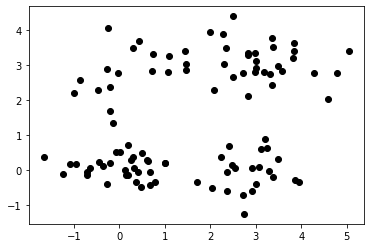

In [148]:
# Problem 1 (c)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

def generate_random_data(N=100):
    """ 
    Generate a random dataset (multivariate normal) 
    Input: N - number of instances to create
    Output: X - generated (synthetic) dataset
    """
    
    means = [[0, 0], [3, 3], [0, 3], [3, 0]]
    covs = [[[0.5, 0], [0, 0.1]], [[0.5, 0], [0, 0.5]], 
            [[0.5, 0], [0, 1.0]], [[0.3, 0], [0, 0.3]]]

    X = np.zeros((N, 2))
    for n in range(N):
        seed = rd.randint(0, 3)
        X[n] = np.random.multivariate_normal(means[seed], covs[seed])
    
    return X

X = generate_random_data()
plt.scatter(X[:,0], X[:,1], c='k')


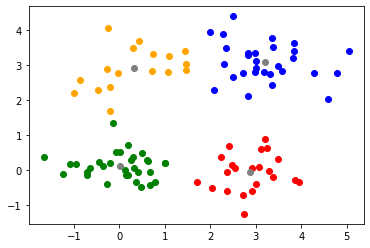

In [149]:
# Problem 3 (c) - part 1
""" TODO: Write your solution here """
c, centroids, log_centroids, log_c, log_sse = kmeans(X=X, K=4)

for i, label in enumerate(c):
    if label == 0:
        color = 'blue'
    elif label ==1:
        color = 'red'
    elif label ==2:
        color = 'orange'
    else:
        color = 'green'
    plt.scatter(X[i,0],X[i,1], color=color)

for i, label in enumerate(centroids):
    plt.scatter(centroids[i,0],centroids[i,1], color= 'gray')
    
plt.show()

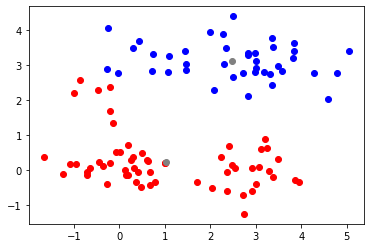

In [150]:
# Problem 3 (c) - part 2
""" TODO: Write your solution here """
c, centroids, log_centroids, log_c, log_sse = kmeans(X=X, K=2)

for i, label in enumerate(c):
    if label == 0:
        color = 'blue'
    else:
        color = 'red'
    plt.scatter(X[i,0],X[i,1], color=color)

for i, label in enumerate(centroids):
    plt.scatter(centroids[i,0],centroids[i,1], color= 'gray')
    
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

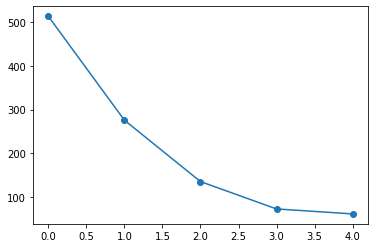

In [151]:
# Problem 3 (c) - part 1,2

c, centroids, log_centroids, log_c, log_sse_1 = kmeans(X=X, K=1)
c, centroids, log_centroids, log_c, log_sse_2 = kmeans(X=X, K=2)
c, centroids, log_centroids, log_c, log_sse_3 = kmeans(X=X, K=3)
c, centroids, log_centroids, log_c, log_sse_4 = kmeans(X=X, K=4)
c, centroids, log_centroids, log_c, log_sse_5 = kmeans(X=X, K=5)

sse = []
sse.append(log_sse_1[-1])
sse.append(log_sse_2[-1])
sse.append(log_sse_3[-1])
sse.append(log_sse_4[-1])
sse.append(log_sse_5[-1])

plt.plot(sse, marker='o')
plt.show

In [152]:
# Problem 1 (d)
def normalize(X):
    """
    mean-std normalization (standardization)
    Takes and applies a normalization on the input matrix X
    Input: X - data matrix (numpy array)
    Output: X_normalized - normalized data matrix
    """
    return (X - X.mean(axis=0)) / X.std(axis=0)


my_data = np.genfromtxt('Mall_Customers.csv', delimiter=',', skip_header=1)
# print(my_data)
N, d = my_data.shape
print(N)
print(d)

from scipy import stats

stats.describe(my_data)

200
4


DescribeResult(nobs=200, minmax=(array([ 0., 18., 15.,  1.]), array([  1.,  70., 137.,  99.])), mean=array([ 0.56, 38.85, 60.56, 50.2 ]), variance=array([2.47638191e-01, 1.95133166e+02, 6.89835578e+02, 6.66854271e+02]), skewness=array([-0.24174689,  0.48191947,  0.31942368, -0.04686531]), kurtosis=array([-1.94155844, -0.68475139, -0.12589283, -0.83595827]))

In [153]:
# Problem 1 (d)-2
stats.describe(normalize(my_data))

DescribeResult(nobs=200, minmax=(array([-1.12815215, -1.49633548, -1.73899919, -1.91002079]), array([0.88640526, 2.23553238, 2.91767117, 1.89449216])), mean=array([-5.99520433e-17, -4.94049246e-17, -3.73034936e-16, -1.06581410e-16]), variance=array([1.00502513, 1.00502513, 1.00502513, 1.00502513]), skewness=array([-0.24174689,  0.48191947,  0.31942368, -0.04686531]), kurtosis=array([-1.94155844, -0.68475139, -0.12589283, -0.83595827]))

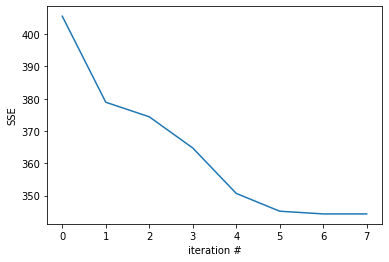

In [154]:
# Problem 1 (e)
""" TODO: Write your solution here """
data = normalize(my_data)
c, centroids, log_centroids, log_c, log_sse = kmeans(X=data, K=5)

plt.plot(log_sse)
plt.xlabel('iteration #')
plt.ylabel('SSE')
plt.show()

/var/folders/lv/kmn9kthn0bs0yd2nq7nzw_bm0000gn/T/ipykernel_23576/2281692246.py:58: RuntimeWarning: invalid value encountered in true_divide
  centroids[k] = tmp_sum / tmp_count


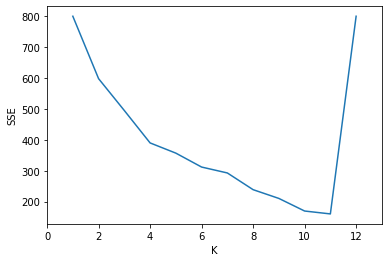

In [155]:
# Problem 1 (f)
""" TODO: Write your solution here """
sse = []
for i in range(1,13):
    c, centroids, log_centroids, log_c, log_sse = kmeans(X=data, K=i)
    sse.append(log_sse[-1])

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], sse)
plt.xlabel("K")
plt.xlim(0, 13)
plt.ylabel("SSE")
plt.show()

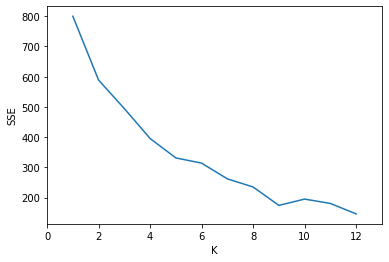

In [156]:
# Problem 1 (g) - Extra point
""" TODO: You may copy the kmeans() function from Problem 1(b) to here
         and modify it from this cell """

# Problem 1 (b)
def kmeans_fixed(X, K, max_iter=100, tol=0.00005, distance_metric=euclidean_distance):
    
    N, d = X.shape
    
    centroids = np.zeros((K, d))
    
    sse = np.Inf    # sum of squared error (objective)
    
    # for bookkeeping
    log_sse = []
    log_c = []
    log_centroids = []

    # initialization
    for k in range(K):
        rand_index = rd.randint(0, N-1)
        centroids[k] = X[rand_index]
#     log_centroids.append(centroids)
    
    # main process
    for i in range(max_iter):
        
        # update the cluster membership
        c = []
        for n in range(N):
            dist_to_centroids = []
            
            for k in range(K):
                dist_to_centroids.append(distance_metric(X[n], centroids[k]))
            
            c.append(np.argmin(dist_to_centroids)) # cluster membership
        log_c.append(c)
        
        # update the centroids
        prev_centroids = centroids  # bookkeeping
        centroids = np.zeros((K, d))
        for k in range(K):
            tmp_sum = np.zeros(d)
            tmp_count = 0
            for n in range(N):
                if c[n] == k:
                    tmp_sum += X[n]
                    tmp_count += 1
            
            if tmp_count !=0:
                centroids[k] = tmp_sum / tmp_count
        log_centroids.append(centroids)
        
        # estimate the sum of the squared errors (sse)
        prev_sse = sse  # bookkeeping
        sse = 0
        for n in range(N):
            sse += distance_metric(X[n], centroids[c[n]]) ** 2
        log_sse.append(sse)
        
        # stopping criterion
        if prev_sse - sse < tol:
            break
    
    return c, centroids, log_centroids, log_c, log_sse

sse = []
for i in range(1,13):
    c, centroids, log_centroids, log_c, log_sse = kmeans_fixed(X=data, K=i)
    sse.append(log_sse[-1])

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], sse)
plt.xlabel("K")
plt.xlim(0, 13)
plt.ylabel("SSE")
plt.show()    

## Problem 2. Image segmentation using k-Means

In [157]:
!pip install opencv-python
import cv2

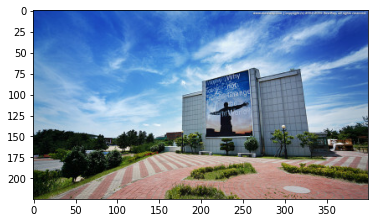

In [158]:
# Read an image file and convert it to an RGB image
img = cv2.imread('hyoam.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [159]:
# Convert the RGB image into an RGB matrix
X_rgb = np.float32(img.reshape((-1,3)))
print(X_rgb)

[[ 23.  61. 170.]
 [ 23.  61. 170.]
 [ 22.  63. 171.]
 ...
 [150.  94.  95.]
 [145.  94.  93.]
 [140.  99.  97.]]


(225, 400, 3)


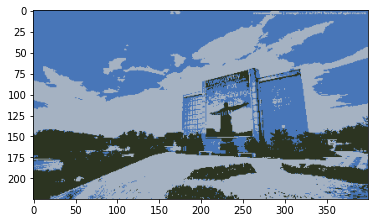

In [160]:
# Problem 2
""" TODO: Write your solution here """
from PIL import Image #for Image.fromarray

# find image pixel count
pix = np.array(img)
print(pix.shape)

# kmeans
this_k = 3 #pick (3, 6, 9)
c, centroids, log_centroids, log_c, log_sse = kmeans(X=X_rgb, K=this_k)

# made image using result
c_list=[]
i=0

for col in range (0, 225):
    collist=[]
    for col in range(0, 400):
        if c[i]==0:
            collist.append(centroids[0])
        elif c[i]==1:
            collist.append(centroids[1])
        elif c[i]==2:
            collist.append(centroids[2])
        i = i+1
    c_list.append(collist)

c_array = np.array(c_list)

# show
result_img = Image.fromarray(c_array.astype('uint8'), 'RGB')
    
plt.imshow(result_img)
